In [1]:
!pip install pytrends

In [4]:
import os

from pytrends.request import TrendReq

import pandas as pd
import numpy as np

import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine

from flask_sqlalchemy import SQLAlchemy
from flask import (
    Flask,
    render_template,
    jsonify)

In [5]:
app = Flask(__name__)

In [6]:
app.config["SQLALCHEMY_DATABASE_URI"] = "sqlite:///static/db/top_trends.db"
db = SQLAlchemy(app)

/anaconda3/envs/PythonData/lib/python3.6/site-packages/flask_sqlalchemy/__init__.py:835: FSADeprecationWarning: SQLALCHEMY_TRACK_MODIFICATIONS adds significant overhead and will be disabled by default in the future.  Set it to True or False to suppress this warning.
  'SQLALCHEMY_TRACK_MODIFICATIONS adds significant overhead and '


In [11]:
Base = automap_base()

In [12]:
Base.prepare(db.engine, reflect=True)

In [15]:
initRegion = Base.classes.region
initTime = Base.classes.time

In [20]:
time_stmt = db.session.query(initTime).statement
time_df = pd.read_sql_query(stmt, db.session.bind)

In [21]:
region_stmt = db.session.query(initRegion).statement
region_df = pd.read_sql_query(stmt, db.session.bind)

In [24]:
time_df.head()

,date,tacos,sandwiches,kebabs,isPartial
0,2014-05-25,14,5,1,False
1,2014-06-01,15,5,1,False
2,2014-06-08,15,5,1,False
3,2014-06-15,16,6,1,False
4,2014-06-22,16,6,1,False


In [25]:
region_df.head()

,date,tacos,sandwiches,kebabs,isPartial
0,2014-05-25,14,5,1,False
1,2014-06-01,15,5,1,False
2,2014-06-08,15,5,1,False
3,2014-06-15,16,6,1,False
4,2014-06-22,16,6,1,False


In [2]:
from pytrends.request import TrendReq

In [3]:
# Login to Google. Only need to run this once, the rest of requests will use the same session.
pytrend = TrendReq()


In [27]:
# Create payload and capture API tokens. Only needed for interest_over_time(), interest_by_region() & related_queries()
pytrend.build_payload(kw_list=['rice'])
words = "lawn mower, rice"
keywords = []
print(words)


lawn mower, rice


In [29]:
lisst = words.split(sep=',')
print(lisst)

['lawn mower', ' rice']


In [37]:
# Interest Over Time
interest_over_time_df = pytrend.interest_over_time()

In [38]:
interest_over_time_df.head()

,rice,isPartial
date,,
2014-06-01,18,False
2014-06-08,18,False
2014-06-15,17,False
2014-06-22,18,False
2014-06-29,18,False


In [39]:
interest_over_time_df.to_dict()

{'rice': {Timestamp('2014-06-01 00:00:00'): 18,
  Timestamp('2014-06-08 00:00:00'): 18,
  Timestamp('2014-06-15 00:00:00'): 17,
  Timestamp('2014-06-22 00:00:00'): 18,
  Timestamp('2014-06-29 00:00:00'): 18,
  Timestamp('2014-07-06 00:00:00'): 18,
  Timestamp('2014-07-13 00:00:00'): 18,
  Timestamp('2014-07-20 00:00:00'): 21,
  Timestamp('2014-07-27 00:00:00'): 23,
  Timestamp('2014-08-03 00:00:00'): 19,
  Timestamp('2014-08-10 00:00:00'): 19,
  Timestamp('2014-08-17 00:00:00'): 20,
  Timestamp('2014-08-24 00:00:00'): 21,
  Timestamp('2014-08-31 00:00:00'): 20,
  Timestamp('2014-09-07 00:00:00'): 100,
  Timestamp('2014-09-14 00:00:00'): 28,
  Timestamp('2014-09-21 00:00:00'): 22,
  Timestamp('2014-09-28 00:00:00'): 20,
  Timestamp('2014-10-05 00:00:00'): 20,
  Timestamp('2014-10-12 00:00:00'): 20,
  Timestamp('2014-10-19 00:00:00'): 20,
  Timestamp('2014-10-26 00:00:00'): 21,
  Timestamp('2014-11-02 00:00:00'): 21,
  Timestamp('2014-11-09 00:00:00'): 21,
  Timestamp('2014-11-16 00:00:0

In [40]:
interest_over_time_df.reset_index(inplace=True)

In [41]:
interest_over_time_df.head()

,date,rice,isPartial
0,2014-06-01,18,False
1,2014-06-08,18,False
2,2014-06-15,17,False
3,2014-06-22,18,False
4,2014-06-29,18,False


In [42]:
new_df = interest_over_time_df.to_dict()

In [43]:
new_df.keys()

dict_keys(['date', 'rice', 'isPartial'])

In [35]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

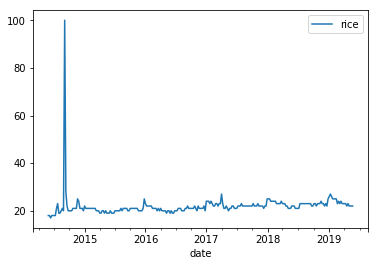

In [44]:
interest_over_time_df.plot(x='date', y='rice',kind="line")

In [15]:
print(interest_over_time_df.head())

            tacos  sandwiches  kebabs isPartial
date                                           
2014-05-25     14           5       1     False
2014-06-01     15           5       1     False
2014-06-08     15           5       1     False
2014-06-15     16           6       1     False
2014-06-22     16           6       1     False


In [16]:
interest_over_time_df.to_csv("interest_over_time_df.csv")

In [17]:
# Interest by Region
interest_by_region_df = pytrend.interest_by_region()

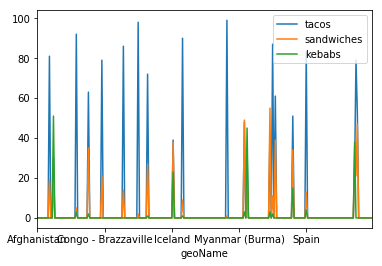

In [18]:
interest_by_region_df.plot(kind="line")

In [19]:
interest_by_region_df.to_csv("interest_by_region_df.csv")